In [1]:
#created by Beatrice Baschetti on 07/08/2023
#last modified on 7/11/2023

This code is dedicated to the computation of the <font color='orange'>silhouette score</font>. The first part of this code computes the mean silhouette score of the data in a certain range of n_clusters. The second part computes the silhouette score of each cluster, for a given value of n_clusters. 

The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). It can range from -1 to +1, where: 

1) Values close to +1 indicate good clustering, with objects assigned to the right clusters and well separated clusters;
2) Values close to 0 indicate that some objects could be assigned to the wrong clusters and that clusters are not well separated/ have some overlapping;
3) Values close to -1 indicate bad clustering, with most objects assigned to the wrong clusters.

More info: https://en.wikipedia.org/wiki/Silhouette_(clustering)

# Import

In [40]:
#numpy
import numpy as np
#pandas
import pandas as pd

#plots
import matplotlib
from matplotlib import pyplot as plt
#colors
import colorcet as cc #colorcet -> https://colorcet.holoviz.org/user_guide/Categorical.html

#scikit-learn
from sklearn import cluster
from sklearn import mixture
from sklearn.metrics import silhouette_samples, silhouette_score

#save options
import csv

#open image with envi header
from spectral import open_image

#computation time
import time

# Part 1: computing mean silhouette score for a given range of n. clusters
In this first part of the notebook you can compute the mean silhouette score for a given range of the number of clusters.
Algorithms available are k-Means and Gaussian Mixture Models. You will have to load the scaled data first, this data can be obtained in CRISM_unsupervised_classification.ipynb notebook. <font color='red'>Please note that this code is computationally expensive and might take several hours (>8h) to run</font>. 

In [41]:
#loading scaled data (X_scaled)
X = np.load('X_scaled_UMAP_100_02_PCA6*.npy')

In [5]:
#choose between K-Means and GMM 
classifier_ = 'GMM'

s_score = {}
#computing silhouette for n_clusters in a given range:
#WARNING: this is VERY computationally expensive

print('Computation started!')

#computation time start
start_time = time.time()

for i in range (6, 18):

    #-------------- K-means --------------------
    if classifier_ == 'K-Means':
        #fit kmeans
        kmeans = cluster.KMeans(n_clusters=i, init = 'k-means++', n_init=1, random_state=0).fit(X)
        # make prediction
        classes = kmeans.predict(X)
        #calculate silhouette
        s_score[i] = (silhouette_score(X, classes))
        #print
        print(f'The silhouette score for {i} clusters is {s_score[i]:.3f}')

    #-------------- Gaussian Mixture --------------------
    if classifier_ == 'GMM':
        #choose from: full, tied, diag, spherical 
        covariance_type = 'diag'
        #choose from: kmeans, k-means++, random, random_from_data
        init_params = 'kmeans'
        g_mixture = mixture.GaussianMixture(n_components=i, random_state=0, covariance_type = covariance_type, init_params = init_params)
        classes = g_mixture.fit_predict(X) 
        #calculate silhouette
        s_score[i] = (silhouette_score(X, classes))
        #print
        print(f'The silhouette score for {i} clusters is {s_score[i]:.3f}')
    
print('done!')    
#computation time end
end_time = time.time()
computation_time = end_time - start_time
#print computation time
print("Computation time:", computation_time, "seconds")

The silhouette score for 6 clusters is 0.374
The silhouette score for 7 clusters is 0.379
The silhouette score for 8 clusters is 0.357
The silhouette score for 9 clusters is 0.345
The silhouette score for 10 clusters is 0.338
The silhouette score for 11 clusters is 0.357
The silhouette score for 12 clusters is 0.359
The silhouette score for 13 clusters is 0.353
The silhouette score for 14 clusters is 0.339
The silhouette score for 15 clusters is 0.343
The silhouette score for 16 clusters is 0.346
The silhouette score for 17 clusters is 0.343
done!
Computation time: 18341.16660141945 seconds


In [6]:
#save the results in a CSV file
with open('s_score_gmm_9b5a_UMAP_PCA6*.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    for key, value in s_score.items():
        writer.writerow([key, value])

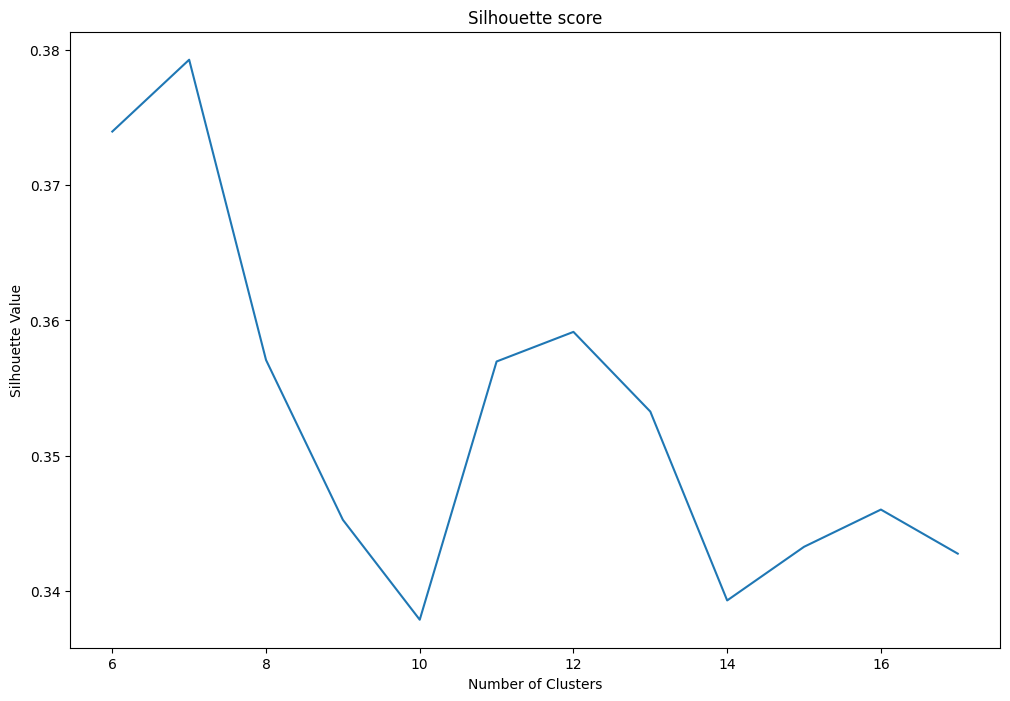

In [7]:
#plot the results
plt.figure(figsize=(12,8))
plt.plot(list(s_score.keys()), list(s_score.values()))
#title and labels...
plt.title('Silhouette score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Value')

#save image
plt.savefig('silhouette_gmm_UMAP_PCA6*_new')

#show image
plt.show()

# Part 2: computing silhouette score for a given n. clusters
In this part of the notebook you can compute the silhouette score for a chosen n. clusters. You have the possibility to visualize the clusters and reassign labels before running the computation.  

## Clustering algorithms

In [128]:
#loading scaled data (X_scaled)
X = np.load('X_scaled_pca6*_9b5a.npy')

In [156]:
#choose a clustering algorithm

#----------- K-means -----------------

classifier = 'K-Means'
n_clusters = 11

#K-means estimator instance + classify scaled data
k_means = cluster.KMeans(n_clusters=n_clusters, init = 'k-means++', n_init=1, random_state=0).fit(X)
labels = k_means.labels_
print('k_means.inertia_ : ',k_means.inertia_)


'''

#------------ Gaussian Mixture -------------

from sklearn import mixture

classifier = 'Gaussian Mixture'
n_clusters = 11

#choose from: full, tied, diag, spherical 
covariance_type = 'diag'
#choose from: kmeans, k-means++, random, random_from_data
init_params = 'kmeans'
g_mixture = mixture.GaussianMixture(n_components=n_clusters, random_state=0, covariance_type = covariance_type, init_params = init_params)
labels = g_mixture.fit_predict(X) 

'''

k_means.inertia_ :  774867.875


"\n\n#------------ Gaussian Mixture -------------\n\nfrom sklearn import mixture\n\nclassifier = 'Gaussian Mixture'\nn_clusters = 15\n\n#choose from: full, tied, diag, spherical \ncovariance_type = 'diag'\n#choose from: kmeans, k-means++, random, random_from_data\ninit_params = 'kmeans'\ng_mixture = mixture.GaussianMixture(n_components=n_clusters, random_state=0, covariance_type = covariance_type, init_params = init_params)\nlabels = g_mixture.fit_predict(X) \n\n"

## Visualize clusters 

### Open image and pandas dataframes
For this part it is necessary to open the I/F image and load some of the dataframes used in the CRISM_unsupervised_classification.ipynb notebook. In order to help the user, the names of the variables are kept the same. 

df = pandas dataframe with initial data

df_nonan = pandas dataframe with...
1) no-data values removed;
2) data is restricted between 1.0-2.6 um;
3) removed filter artefact at 1.645-1.704 um;
3) removed CO2 artefact at 1.948-2.060 um.

In [157]:
#data path
path_if = 'data/9B5A/frt00009b5a_07_if165j_mtr3.hdr'

#-------

#open I/F file
img = open_image(path_if)
wavelength = np.array(img.metadata['wavelength']).astype(float)

#open pandas dataframe (df and df_nonan)

df = pd.read_pickle("df_frt00009b5a_07_if165j_mtr3.pkl")
df_nonan = pd.read_pickle("df_nonan_frt00009b5a_07_if165j_mtr3.pkl")

### Relabelling of features with centroids (optional)
Normally, clustering algorithms assigns labels to clusters randomly.
In this part of the code you can change how the labels are assigned to the clusters as originally implemented here https://gist.github.com/kidpixo/6ec6c6c575e19b09da3d2207efa38b24

Labels are assigned based on the reflectance value at a chosen wavelength of each class' mean spectrum. If the generated classes are similar between k-Means algorithm and GMMs, colors should stay the same allowing the user to easily compare the different methods.

In [158]:
#function to find nearest value in a numpy array 
from find_nearest import find_nearest

In [159]:
y = df_nonan.groupby(labels).mean().values #get mean spectrum of each cluster

In [160]:
feature_index = find_nearest(2.4, df_nonan.columns.values) #choose the wavelength and get the corresponding index
centroids_sorting_index = np.argsort(y[:, feature_index]) #get index that sorts y at the chosen feature 
centroids_sorted_labels = np.argsort(centroids_sorting_index) #this operation produces an array with the sorted labels 

In [161]:
#visualize the sorting steps
pd.DataFrame(data=[np.unique(labels),y[:, feature_index],centroids_sorting_index,centroids_sorted_labels],
            index=['labels',f'cluster mean (refl) at  {df_nonan.columns[feature_index]:1.3f} um','centroids_sorting_index','centroids_sorted_labels']).T

,labels,cluster mean (refl) at 2.397 um,centroids_sorting_index,centroids_sorted_labels
0,0.0,0.236927,1.0,10.0
1,1.0,0.199619,4.0,0.0
2,2.0,0.212106,2.0,2.0
3,3.0,0.224638,7.0,4.0
4,4.0,0.204150,3.0,1.0
5,5.0,0.228338,8.0,7.0
6,6.0,0.236038,9.0,9.0
7,7.0,0.216848,5.0,3.0
8,8.0,0.224983,10.0,5.0
9,9.0,0.225516,6.0,6.0


In [162]:
# change the classes with the new integers 
labels = pd.Series(labels).map(dict(zip(np.arange(n_clusters), centroids_sorted_labels))).values.squeeze()

#visualize old and new indexes
print(f'index for label sort: index : {feature_index} - wav : {df_nonan.columns[feature_index]:1.3f} um')
print(f'ind : y_feat > new_index')
for i, yf, ni in zip(range(len(y[:, feature_index])),y[:,feature_index], centroids_sorted_labels):
    print(f'{i:3} : {yf:2.3f} > {ni:>4}')

index for label sort: index : 180 - wav : 2.397 um
ind : y_feat > new_index
  0 : 0.237 >   10
  1 : 0.200 >    0
  2 : 0.212 >    2
  3 : 0.225 >    4
  4 : 0.204 >    1
  5 : 0.228 >    7
  6 : 0.236 >    9
  7 : 0.217 >    3
  8 : 0.225 >    5
  9 : 0.226 >    6
 10 : 0.232 >    8


In [163]:
#going back to data cubes
class_plot_df = pd.DataFrame(index=df.index)

#assign new labels
class_plot_df['labels'] = np.nan
labels = labels.reshape(-1,1)
class_plot_df.loc[df_nonan.index] = labels

### Plot

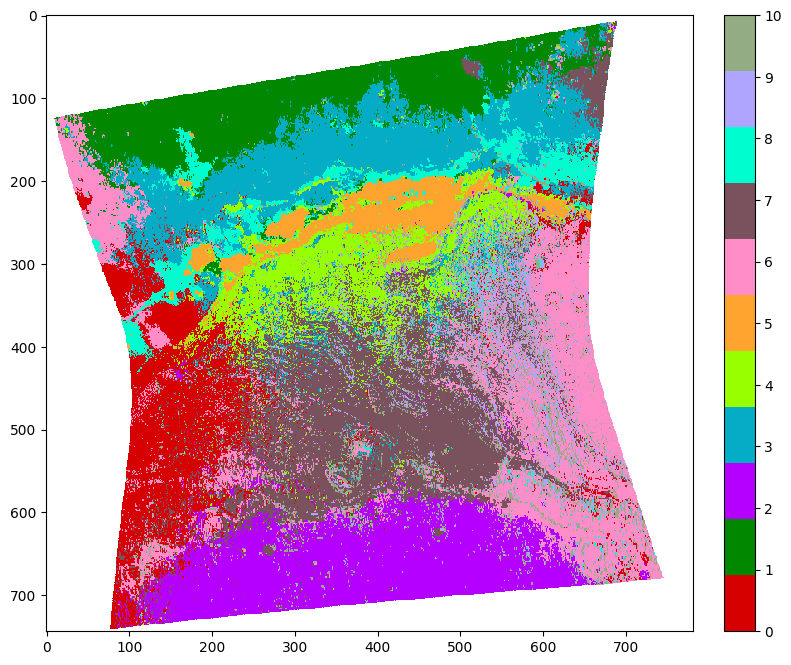

In [164]:
#plotting the clusters
fig = plt.subplots(figsize=(10,8))

#colors
color_list = cc.glasbey_light[:n_clusters]
cmap = matplotlib.colors.ListedColormap(color_list)
 
im = plt.imshow(class_plot_df['labels'].values.reshape(img.shape[:-1]),interpolation='None',cmap=cmap) 

#color bar
cbar = plt.colorbar(im, fraction = 0.05, pad = 0.04)
#set the number of ticks on the color bar
num_ticks = n_clusters
cbar.locator = plt.MaxNLocator(num_ticks)
# Update the color bar
cbar.update_ticks()

#save img
#plt.savefig('img.png')
plt.show()

## Compute silhouette

Here you can compute:
1) Average silhouette score for the chosen number of clusters;
2) Average silhouette score for each cluster.

<font color='red'>Please note that this code is computationally expensive and might take some hours to run</font>.

The code implemented here was taken from:
https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

In [165]:
#compute the average silhouette score
#WARNING: this is computationally expensive
silhouette_avg = silhouette_score(X, labels.ravel()) 
print("For n_clusters=", 
      n_clusters, 
      "The average silhouette score is:",
      silhouette_avg,
)

For n_clusters= 11 The average silhouette score is: 0.20933083


In [166]:
#compute the silhouette score for each sample
sample_silhouette_values = silhouette_samples(X, labels.ravel()) 
#save the results
np.save('sample_silhouette_values_PCA6*_kmeans_11.npy', sample_silhouette_values)

### Plot

The silhouette plot implemented here displays the silhouette score for each pixel in the image grouped by class label, while the red dashed line shows the mean silhouette value taking into consideration all the pixels. 

This kind of plot helps to assess the quality of clustering visually: pixels with higher positive values are assigned to the right cluster, pixels with values close to zero could be assigned to the wrong clusters or they are close to the clusters boundary, while pixels with negative values are probably assigned to the wrong cluster. Similar thicknesses in the plot imply similar size of clusters.

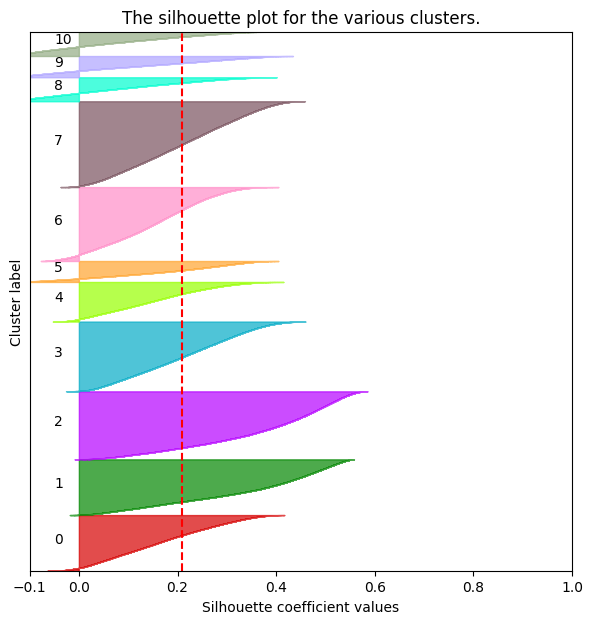

In [167]:
#plot
fig, ax = plt.subplots()
fig.set_size_inches(7, 7)

#axes limits
ax.set_xlim([0,1])
ax.set_ylim([0, len(X) + (n_clusters +1)*10])

y_lower = 10

for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[labels.ravel() == i]
    ith_cluster_silhouette_values.sort()
    
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    
    #same colors as the plot above
    color = cc.glasbey_light[i]
    ax.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor = color, 
        edgecolor = color, 
        alpha = 0.7,
    )

    #label silhouette plots with their cluster number at the middle
    ax.text(-0.05, y_lower+0.5*size_cluster_i, str(i))

    #compute the new y_lower for the next plot
    y_lower = y_upper +10
    
#title and labels...
ax.set_title("The silhouette plot for the various clusters.")
ax.set_xlabel("Silhouette coefficient values")
ax.set_ylabel("Cluster label")

#vertical line for average silhouette score of all the values
ax.axvline(x=silhouette_avg, color="red", linestyle="--")

ax.set_yticks([])  # Clear the yaxis labels / ticks
ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

#save
plt.savefig('silhouette_clusters_with_cluster_colors_kmeans_PCA6*_11_.png')
plt.show()